1. Importer les Bibliothèques Nécessaires

In [2]:
# Import des bibliothèques pour la manipulation, la visualisation des données et la modélisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.cluster import KMeans


2. Charger les Données

In [4]:
# Charger le dataset
data = pd.read_csv('data_commerce.csv')


3. Préparation des Données

In [5]:
# Gérer les valeurs manquantes
data.fillna(method='ffill', inplace=True)

# Encodage des variables catégorielles
label_encoder = LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'])
data['Status'] = label_encoder.fit_transform(data['Status'])
data['Category'] = label_encoder.fit_transform(data['Category'])

# Convertir les dates en format datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['RegistrationDate'] = pd.to_datetime(data['RegistrationDate'])


4. Analyse Exploratoire des Données (EDA)


4.1 Statistiques Descriptives


            Quantity      UnitPrice     CustomerID        Country  \
count  541909.000000  541909.000000  541909.000000  541909.000000   
mean        9.552250       4.611114   15272.795237      34.259772   
std       218.081158      96.759853    1737.934523       6.222861   
min    -80995.000000  -11062.060000   12346.000000       0.000000   
25%         1.000000       1.250000   13798.000000      36.000000   
50%         3.000000       2.080000   15145.000000      36.000000   
75%        10.000000       4.130000   16803.000000      36.000000   
max     80995.000000   38970.000000   18287.000000      37.000000   

                 Age       Category          Stock         Rating  \
count  541909.000000  541909.000000  541909.000000  541909.000000   
mean       43.518310       2.499040      50.050909       2.999986   
std        14.993098       1.707606      28.578121       1.155375   
min        18.000000       0.000000       1.000000       1.000000   
25%        31.000000       1.0000

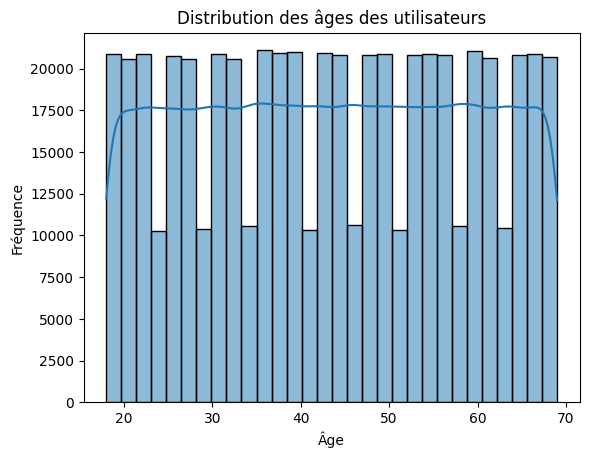

In [6]:
# Statistiques descriptives
print(data.describe())

# Distribution de la variable Age
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution des âges des utilisateurs')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()


4.2 Visualisation de la Répartition des Catégories

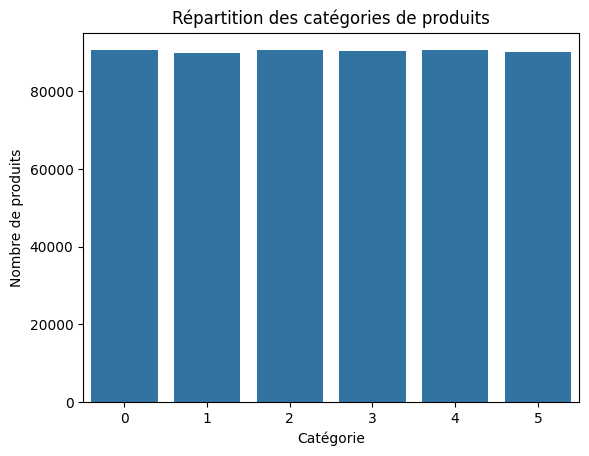

In [7]:
# Répartition des catégories de produits
sns.countplot(data=data, x='Category')
plt.title('Répartition des catégories de produits')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de produits')
plt.show()


5. Modélisation Prédictive


5.1 Prédiction de la Probabilité d'Achat


Pour prédire la probabilité d'achat, nous utilisons la régression logistique.

In [8]:
# Variables prédictives et cible
X = data[['Quantity', 'UnitPrice', 'Age', 'Stock', 'Rating']]
y = data['Status']  # par exemple, 0 = annulé, 1 = livré

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modèle de régression logistique
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Prédictions
y_pred = log_model.predict(X_test)

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


Accuracy: 0.33264748759019025
F1 Score: 0.28179369792844466
              precision    recall  f1-score   support

           0       0.33      0.71      0.45     35984
           1       0.34      0.10      0.16     36218
           2       0.34      0.18      0.24     36180

    accuracy                           0.33    108382
   macro avg       0.33      0.33      0.28    108382
weighted avg       0.33      0.33      0.28    108382



5.2 Segmentation des Utilisateurs (Clustering)


Nous utilisons K-means pour segmenter les utilisateurs.



C:\Users\Hp 14s\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


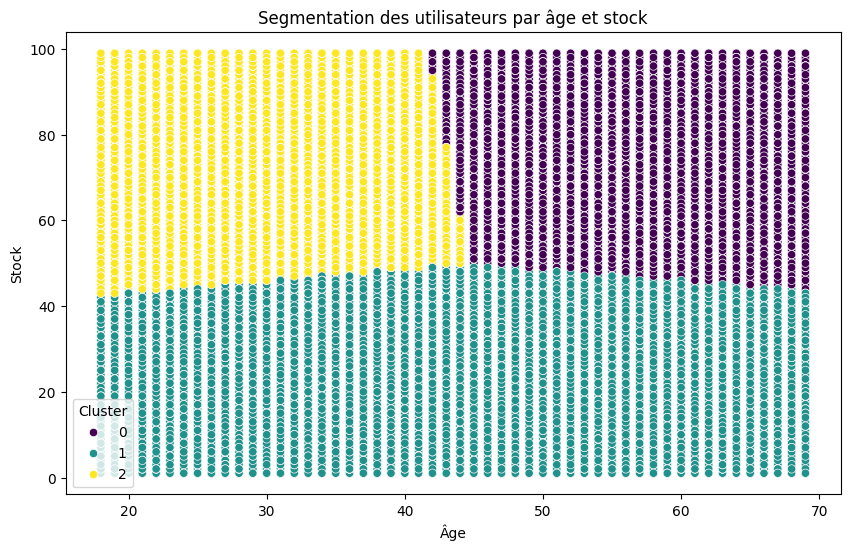

In [10]:
# Segmentation des utilisateurs en utilisant l'âge et le stock
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Age', 'Stock']])

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Stock', hue='Cluster', data=data, palette='viridis')
plt.title('Segmentation des utilisateurs par âge et stock')
plt.xlabel('Âge')
plt.ylabel('Stock')
plt.show()


6. Visualisation et Communication des Résultats


Pour la visualisation, vous pouvez utiliser Tableau pour créer un tableau de bord interactif ou continuer à utiliser des graphiques dans Python pour visualiser les KPI et autres insights.

6.1 Exemple de Tableau de Bord Interactif avec Plotly


In [12]:
import plotly.express as px

# Exemple de visualisation interactive de la répartition des catégories de produits
fig = px.pie(data, names='Category', title='Répartition des catégories de produits')
fig.show()


7. Enregistrement des Modèles (Facultatif)


In [13]:
import joblib

# Enregistrer le modèle de régression logistique
joblib.dump(log_model, 'logistic_regression_model.pkl')

# Enregistrer le modèle de clustering KMeans
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']